<a href="https://colab.research.google.com/github/ArditaHoti/DeliveryApp/blob/main/IndoorAirQuality_Regression_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
# Necessary for the entire / most of the development lifecycle
import pandas as pd
import numpy as np
import sklearn as skl

# For Data extraction
from sklearn.model_selection import train_test_split

# For EDA
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt


# For Pre-processing
from sklearn.preprocessing import StandardScaler

# For Model training
from sklearn.ensemble import RandomForestClassifier

# For Model evaluation

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [275]:
# Step 1: Load the data into panda dataframe
df = pd.read_excel('/content/drive/MyDrive/datasets/airquality.xlsx')

In [228]:
# Step 2: Checking for missing values and handle them if neccesary
print(df.isnull().sum()) #Checking for missing values

Date_Time            0
Temperature          0
Relative Humidity    0
PM2.5                0
TVOC                 0
CO2                  0
Air Pressure         0
PM1                  0
PM4                  0
PM10                 0
Formaldehyde         0
Light                0
Sound                0
Virus Index          0
dtype: int64


<Axes: >

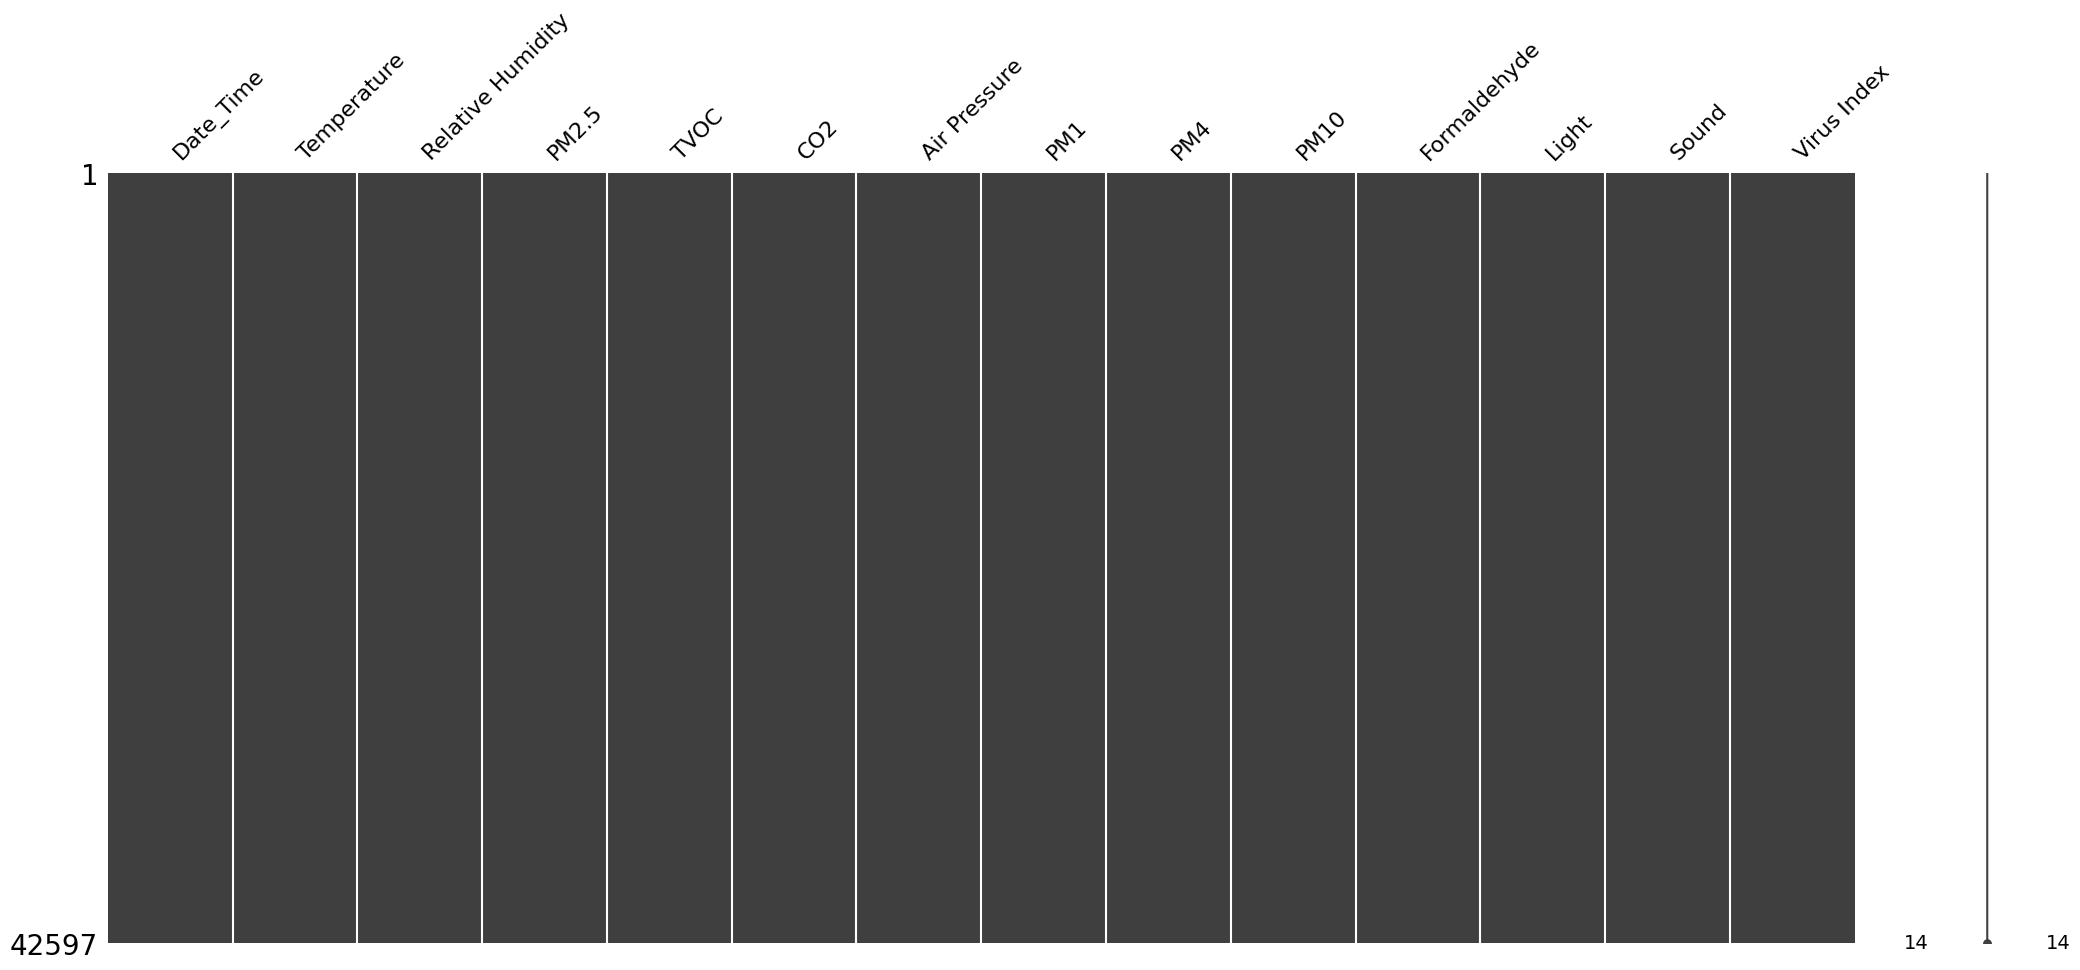

In [229]:
msno.matrix(df)

In [230]:
# Step 3: Explore the data using summary statistics
print(df.describe())

        Temperature  Relative Humidity         PM2.5          TVOC  \
count  42597.000000       42597.000000  42597.000000  42597.000000   
mean      27.023858          42.493711      2.111135   2622.832641   
std        1.961075           3.969465      3.697139   6083.233742   
min       19.300000          32.700000      0.000000      0.000000   
25%       25.600000          40.500000      1.000000    126.000000   
50%       26.700000          42.400000      1.000000   1487.000000   
75%       28.300000          44.400000      2.000000   2654.000000   
max       33.700000          57.100000    135.000000  60000.000000   

                CO2  Air Pressure           PM1           PM4          PM10  \
count  42597.000000  42597.000000  42597.000000  42597.000000  42597.000000   
mean     540.931920   1000.719917      1.955325      2.123905      2.126018   
std      113.896874      5.647755      3.419286      3.786104      3.803511   
min      400.000000    986.100000      0.000000      

##EDA Questions
How many observations and variables are in the dataset?

What is the range of values for each variable?

What is the distribution of each parameter measured by the uHoo device? Are there any outliers or missing values?

Are there any correlations between the different parameters? For example, is there a relationship between temperature and humidity, or between carbon dioxide and volatile organic compounds?

How do the different parameters vary over time? Are there any daily, weekly, or seasonal patterns?

How do the measured parameters compare to recommended levels for indoor air quality? Are there any parameters that consistently exceed recommended levels?

How can the data be visualized in order to better understand the patterns and relationships within the data? For example, can scatter plots, heat maps, or time series plots be used to visualize the data?.

##How many observations and variables are in the dataset?

In [231]:
print(f"Number of observations: {len(df)}")
print(f"Number of variables: {len(df.columns)}")

Number of observations: 42597
Number of variables: 14


##What is the range of values for each variable?

In [232]:
print(df.describe())

        Temperature  Relative Humidity         PM2.5          TVOC  \
count  42597.000000       42597.000000  42597.000000  42597.000000   
mean      27.023858          42.493711      2.111135   2622.832641   
std        1.961075           3.969465      3.697139   6083.233742   
min       19.300000          32.700000      0.000000      0.000000   
25%       25.600000          40.500000      1.000000    126.000000   
50%       26.700000          42.400000      1.000000   1487.000000   
75%       28.300000          44.400000      2.000000   2654.000000   
max       33.700000          57.100000    135.000000  60000.000000   

                CO2  Air Pressure           PM1           PM4          PM10  \
count  42597.000000  42597.000000  42597.000000  42597.000000  42597.000000   
mean     540.931920   1000.719917      1.955325      2.123905      2.126018   
std      113.896874      5.647755      3.419286      3.786104      3.803511   
min      400.000000    986.100000      0.000000      

# What is the distribution of each parameter measured by the uHoo device? Are there any outliers or missing values? 

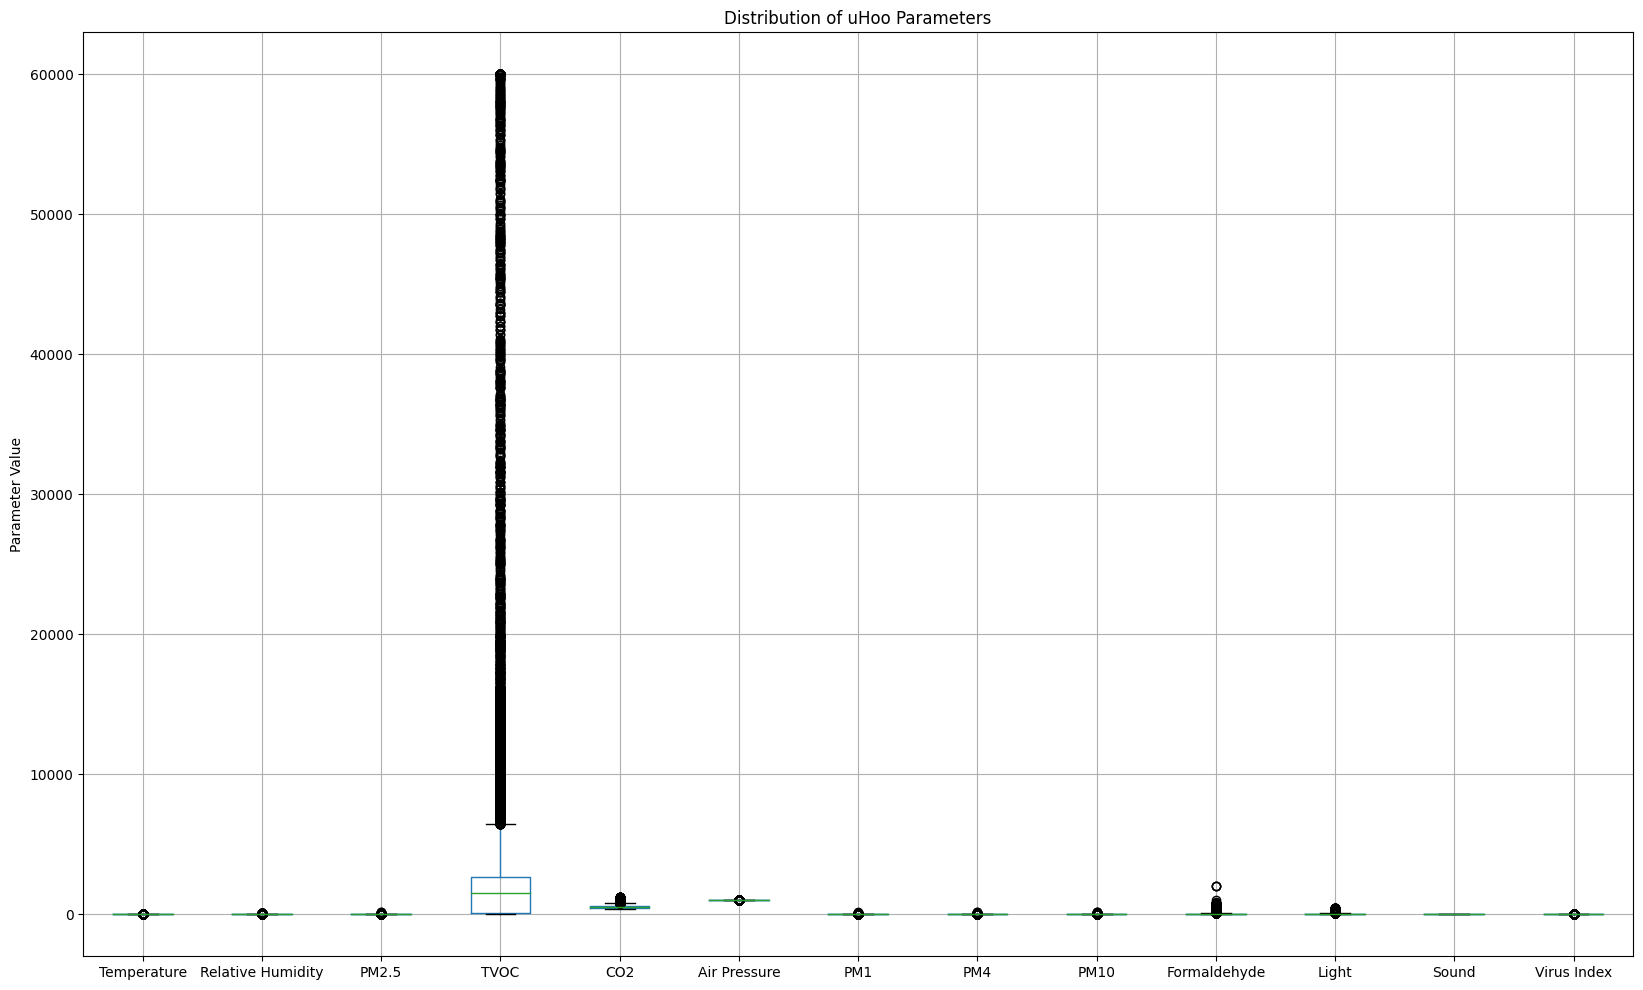

In [233]:
# Visualize distribution of each parameter using box plots
df.boxplot(figsize=(20, 12))
plt.title('Distribution of uHoo Parameters')
plt.ylabel('Parameter Value')
plt.show()

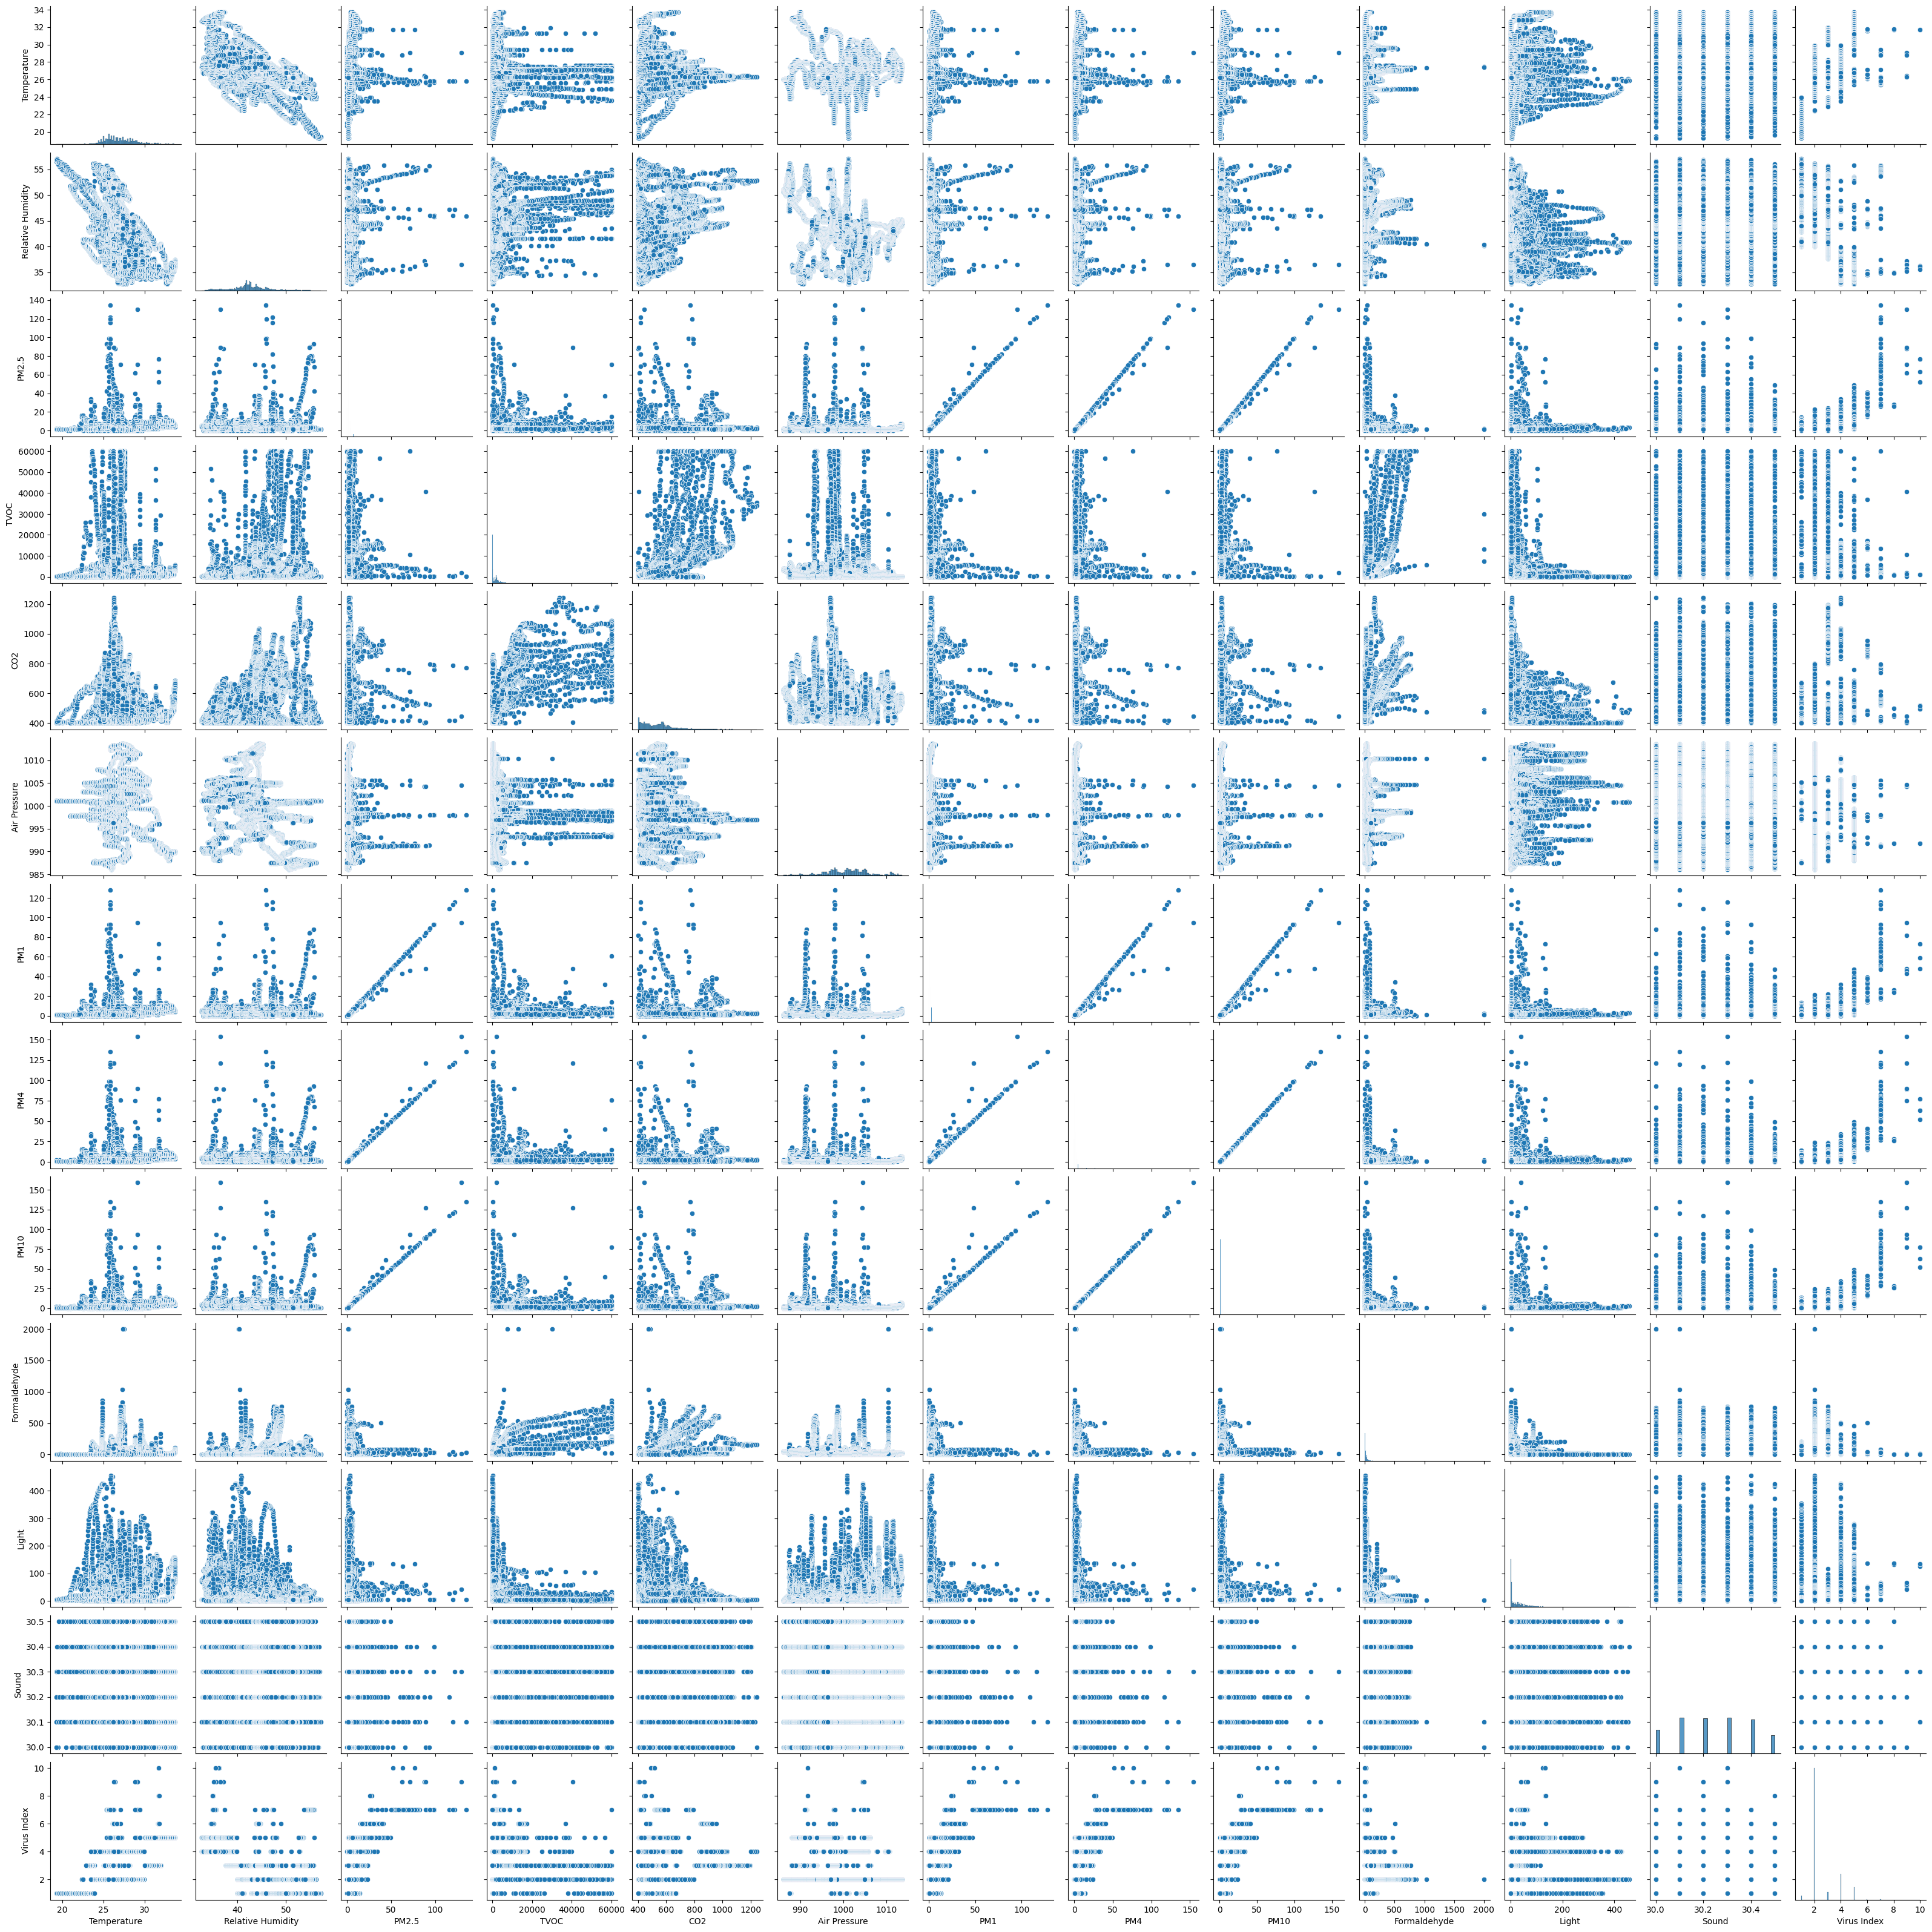

In [234]:
sns.pairplot(df)

##Are there any correlations between the different parameters? For example, is there a relationship between temperature and humidity, or between carbon dioxide and volatile organic compounds?

In [235]:
# Calculate Pearson correlation coefficient between each pair of parameters
corr = df.corr(method='pearson')
corr

<ipython-input-235-f7cd82846555>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


Temperature  Relative Humidity     PM2.5      TVOC  \
Temperature           1.000000          -0.475882  0.212876 -0.072426   
Relative Humidity    -0.475882           1.000000  0.003323  0.286828   
PM2.5                 0.212876           0.003323  1.000000  0.127749   
TVOC                 -0.072426           0.286828  0.127749  1.000000   
CO2                  -0.143619           0.475162  0.061607  0.494297   
Air Pressure         -0.018264          -0.262575 -0.153621 -0.154516   
PM1                   0.217190           0.003682  0.992412  0.126246   
PM4                   0.207817           0.002997  0.997608  0.128719   
PM10                  0.206845           0.002978  0.996736  0.128835   
Formaldehyde          0.055980           0.301614  0.052049  0.678420   
Light                 0.153996          -0.248997 -0.011389 -0.135367   
Sound                -0.013827           0.003217  0.004391  0.019268   
Virus Index           0.582863          -0.635632  0.363755 -0.010233   

                        CO2  Air Pressure       PM1       PM4      PM10  \
Temperature       -0.143619     -0.018264  0.217190  0.207817  0.206845   
Relative Humidity  0.475162     -0.262575  0.003682  0.002997  0.002978   
PM2.5              0.061607     -0.153621  0.992412  0.997608  0.996736   
TVOC               0.494297     -0.154516  0.126246  0.128719  0.128835   
CO2                1.000000     -0.150556  0.063566  0.059879  0.059555   
Air Pressure      -0.150556      1.000000 -0.154438 -0.150689 -0.150202   
PM1                0.063566     -0.154438  1.000000  0.984735  0.982906   
PM4                0.059879     -0.150689  0.984735  1.000000  0.999884   
PM10               0.059555     -0.150202  0.982906  0.999884  1.000000   
Formaldehyde       0.353248     -0.140392  0.053812  0.051369  0.051314   
Light             -0.309803      0.160890 -0.012905 -0.010197 -0.009933   
Sound              0.009724     -0.020791  0.004261  0.004176  0.004158   
Virus Index       -0.192803     -0.076381  0.363940  0.360914  0.360250   

                   Formaldehyde     Light     Sound  Virus Index  
Temperature            0.055980  0.153996 -0.013827     0.582863  
Relative Humidity      0.301614 -0.248997  0.003217    -0.635632  
PM2.5                  0.052049 -0.011389  0.004391     0.363755  
TVOC                   0.678420 -0.135367  0.019268    -0.010233  
CO2                    0.353248 -0.309803  0.009724    -0.192803  
Air Pressure          -0.140392  0.160890 -0.020791    -0.076381  
PM1                    0.053812 -0.012905  0.004261     0.363940  
PM4                    0.051369 -0.010197  0.004176     0.360914  
PM10                   0.051314 -0.009933  0.004158     0.360250  
Formaldehyde           1.000000 -0.119339 -0.002107    -0.091780  
Light                 -0.119339  1.000000 -0.001368     0.180936  
Sound                 -0.002107 -0.001368  1.000000     0.008377  
Virus Index           -0.091780  0.180936  0.008377     1.000000

<ipython-input-236-d78bab1a8450>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


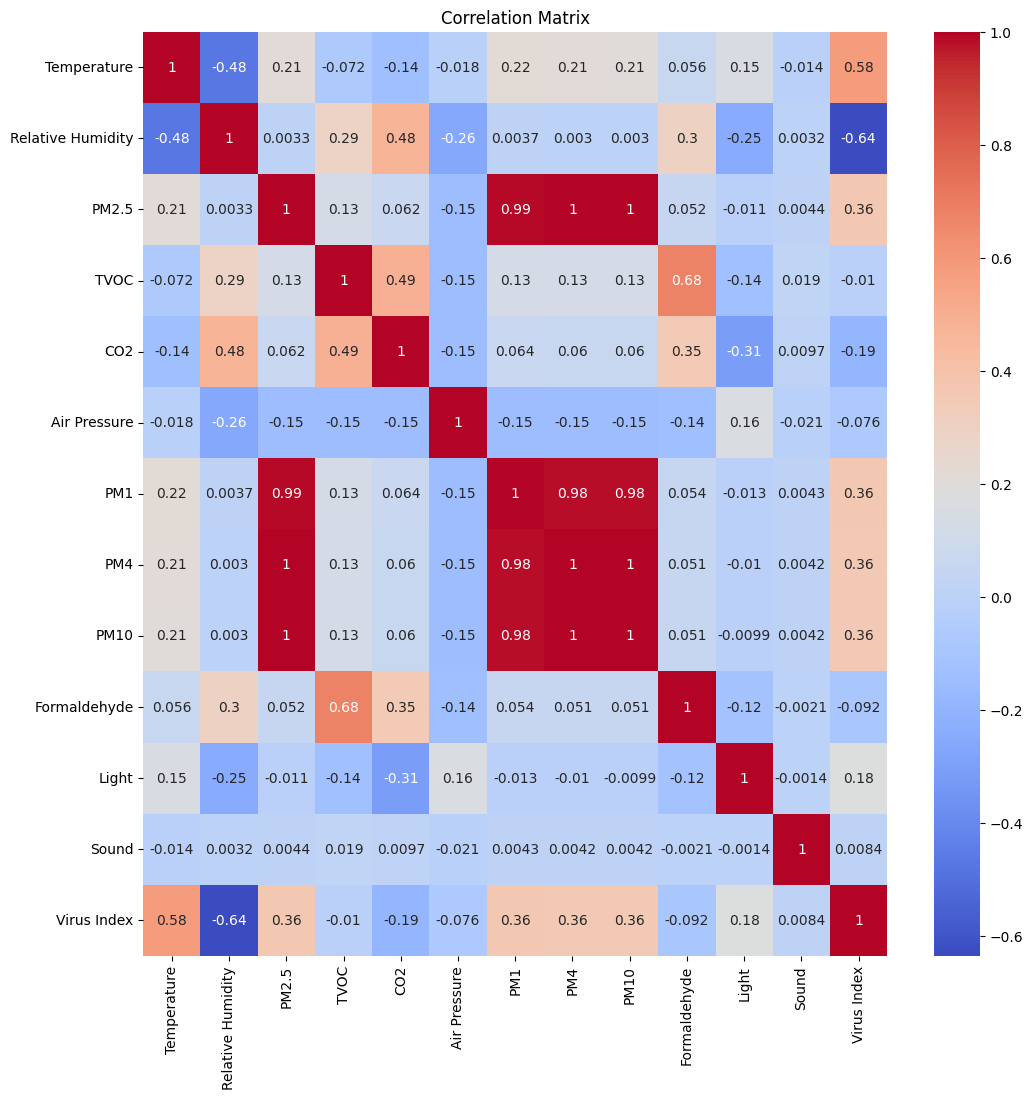

In [236]:
# create a correlation matrix
corr = df.corr()

# set figure size
fig, ax = plt.subplots(figsize=(12, 12))

# create a heatmap of the correlation matrix
sns.heatmap(corr, cmap="coolwarm", annot=True, ax=ax)

# add title
plt.title("Correlation Matrix")

# display the plot
plt.show()

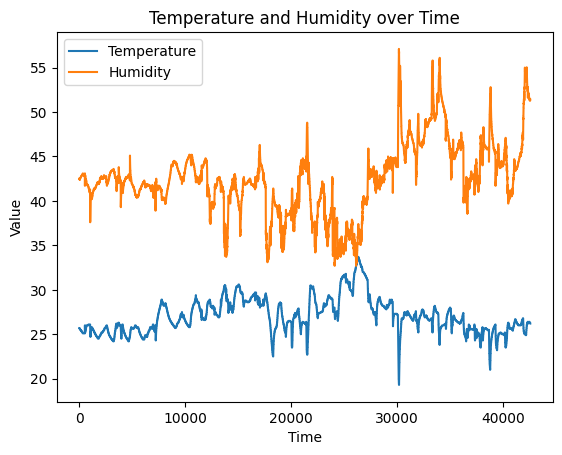

In [237]:

# create line plot of temperature and humidity over time
plt.plot(df.index, df["Temperature"], label="Temperature")
plt.plot(df.index, df["Relative Humidity"], label="Humidity")

# add title and axis labels
plt.title("Temperature and Humidity over Time")
plt.xlabel("Time")
plt.ylabel("Value")

# add legend
plt.legend()

# display the plot
plt.show()

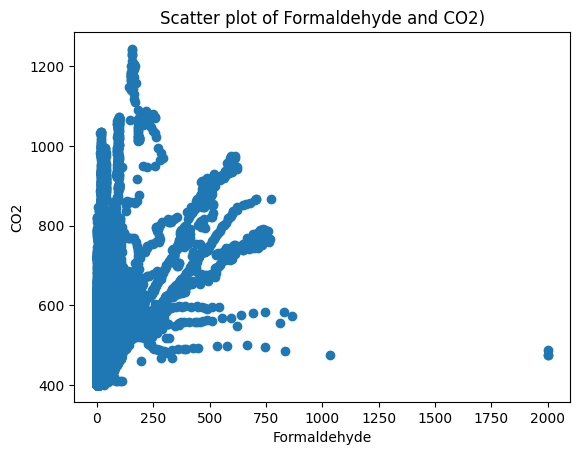

In [238]:
# Plot the data
plt.scatter(x="Formaldehyde", y="CO2", data=df)

# Add title and correlation coefficient to the plot
plt.title("Scatter plot of Formaldehyde and CO2)")
plt.xlabel("Formaldehyde")
plt.ylabel("CO2")

# Show the plot
plt.show()

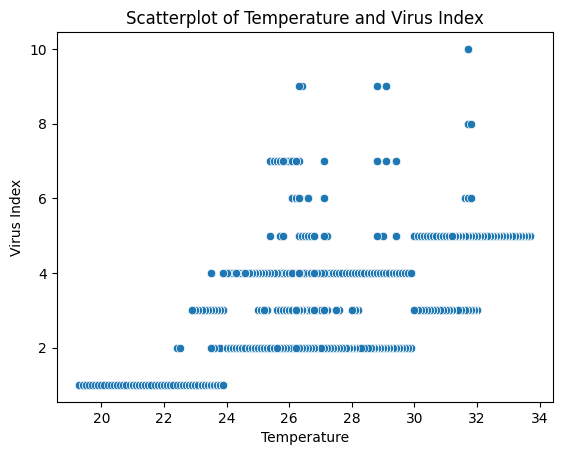

In [239]:
# create a scatterplot
sns.scatterplot(x="Temperature", y="Virus Index", data=df)

# add title and axis labels
plt.title("Scatterplot of Temperature and Virus Index")
# plt.xlabel("Temperature (Celsius)")
# plt.ylabel("Humidity (%)")

# display the plot
plt.show()

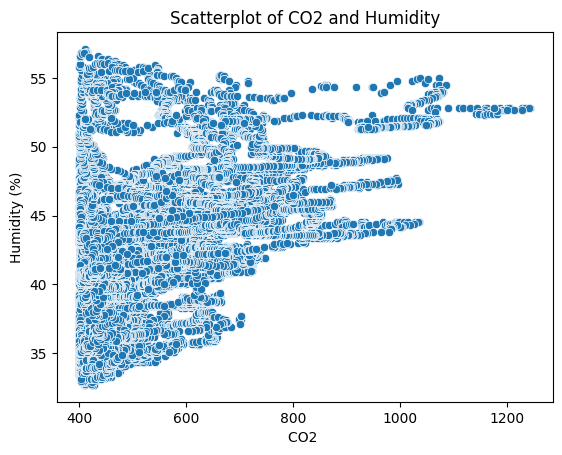

In [240]:
# create a scatterplot
sns.scatterplot(x="CO2", y="Relative Humidity", data=df)

# add title and axis labels
plt.title("Scatterplot of CO2 and Humidity")
plt.xlabel("CO2 ")
plt.ylabel("Humidity (%)")

# display the plot
plt.show()

##How do the different parameters vary over time? Are there any daily, weekly, or seasonal patterns?

In [241]:
# Convert Date and Time column to datetime format
#df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Create new columns for day of the week and hour of the day
df['day_of_week'] = df['Date_Time'].dt.day_name()
df['hour_of_day'] = df['Date_Time'].dt.hour

# Group the data by day of the week and hour of the day, and calculate the average air quality measurements for each group
grouped = df.groupby(['day_of_week', 'hour_of_day']).mean()[['PM2.5', 'CO2', 'TVOC','Virus Index']]

# Display the results
print(grouped)

                            PM2.5         CO2         TVOC  Virus Index
day_of_week hour_of_day                                                
Friday      0            1.239203  591.186047  2306.129568     2.398671
            1            1.013333  618.066667  2286.580000     2.400000
            2            0.883333  633.583333  2405.916667     2.400000
            3            0.753333  641.580000  2612.946667     2.400000
            4            0.736667  649.423333  2529.626667     2.400000
...                           ...         ...          ...          ...
Wednesday   19           1.233333  471.725000  1398.937500     2.500000
            20           4.982063  491.417040  1264.426009     2.798206
            21           1.179167  505.100000  1811.158333     2.500000
            22           1.836820  543.661088  2762.154812     2.451883
            23           1.732218  557.359833  2256.820084     2.246862

[168 rows x 4 columns]


<ipython-input-241-1fd120778968>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby(['day_of_week', 'hour_of_day']).mean()[['PM2.5', 'CO2', 'TVOC','Virus Index']]


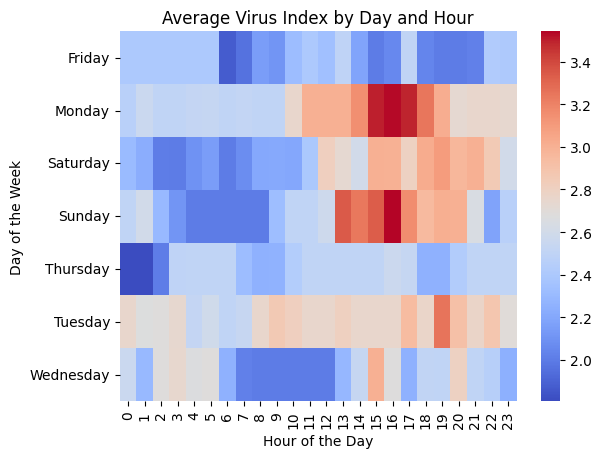

In [242]:

# Pivot the grouped data to make it suitable for a heat map
pivot = grouped.pivot_table(index='day_of_week', columns='hour_of_day', values='Virus Index')

# Create the heat map using seaborn
sns.heatmap(pivot, cmap='coolwarm')

# Set the plot title and axis labels
plt.title('Average Virus Index by Day and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Show the plot
plt.show()

In [243]:
df['day_of_week'].value_counts(dropna =False)

Friday       7168
Saturday     7106
Thursday     5743
Monday       5678
Sunday       5665
Wednesday    5625
Tuesday      5612
Name: day_of_week, dtype: int64

##What is the distribution of the Virus Index score? Are there any trends or patterns in the data?

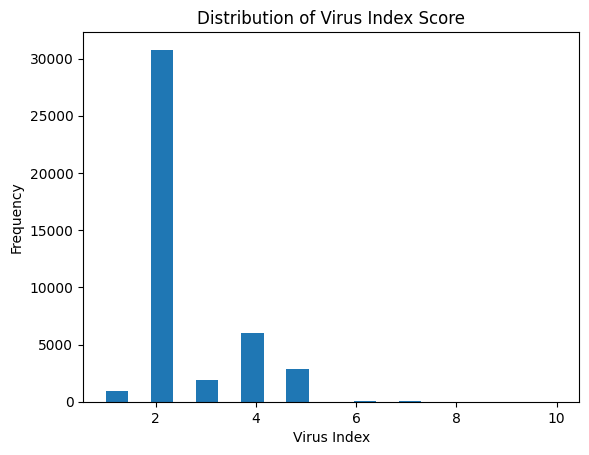

In [244]:
# plot histogram of Virus Index score
plt.hist(df['Virus Index'], bins=20)
plt.xlabel('Virus Index')
plt.ylabel('Frequency')
plt.title('Distribution of Virus Index Score')
plt.show()

In [245]:
# Define recommended levels for each parameter
pm25_max = 25      # World Health Organization guideline This is typically measured over a 24-hour period and is expressed in micrograms per cubic meter (μg/m³).
co2_max = 1000     # Environmental Protection Agency guideline This is typically measured over a 24-hour period and is expressed in parts per million (ppm)

# Check if measured parameters exceed recommended levels
pm25_exceed = df['PM2.5'] > pm25_max
co2_exceed = df['CO2'] > co2_max

# Print number of instances where parameters exceeded
print("Number of instances where PM2.5 exceeded recommended level:", pm25_exceed.sum())
print("Number of instances where CO2 exceeded recommended level:", co2_exceed.sum())

Number of instances where PM2.5 exceeded recommended level: 125
Number of instances where CO2 exceeded recommended level: 192


##PREPROCESSING DATA


Preprocessing data plays a crucial role in ensuring the accuracy, reliability, and appropriate format of data for analysis and machine learning purposes. This, in turn, can enhance the quality of outcomes produced by data analysis and machine learning algorithms while reducing the processing time and resources required by eliminating unnecessary data

Above we have shown that there is not any missing values, but we do have many outliers in different columns. That's why we are going to look at each column with outlieres, if there is a very low percentage of the outliers in total values range, we can remove them.

In [246]:
df.columns

Index(['Date_Time', 'Temperature', 'Relative Humidity', 'PM2.5', 'TVOC', 'CO2',
       'Air Pressure', 'PM1', 'PM4', 'PM10', 'Formaldehyde', 'Light', 'Sound',
       'Virus Index', 'day_of_week', 'hour_of_day'],
      dtype='object')

<Axes: >

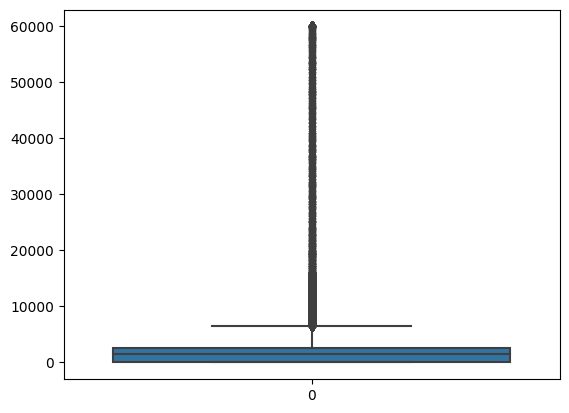

In [247]:
sns.boxplot(df["TVOC"])

In [248]:
#Finding out how much outliers do we have
df[df["TVOC"] > 5500]

Date_Time  Temperature  Relative Humidity  PM2.5   TVOC  CO2  \
6261  2022-07-05 08:33:00         24.9               41.6      0  10525  545   
6262  2022-07-05 08:34:00         24.9               41.6      0  59721  545   
6263  2022-07-05 08:35:00         24.9               41.6      0  60000  548   
6264  2022-07-05 08:36:00         24.9               41.6      0  60000  556   
6265  2022-07-05 08:37:00         24.9               41.6      1  60000  573   
...                   ...          ...                ...    ...    ...  ...   
42592 2022-07-30 23:54:00         26.2               51.3      1  34252  947   
42593 2022-07-30 23:55:00         26.2               51.3      1  36006  950   
42594 2022-07-30 23:56:00         26.2               51.3      2  33566  951   
42595 2022-07-30 23:57:00         26.2               51.3      2  31335  946   
42596 2022-07-30 23:58:00         26.2               51.4      1  30638  940   

       Air Pressure  PM1  PM4  PM10  Formaldehyde  Light  Sound  Virus Index  \
6261         1004.6    0    0     0            73     20   30.4            2   
6262         1004.6    0    0     0           284     20   30.2            2   
6263         1004.6    0    0     0           619     19   30.2            2   
6264         1004.6    0    0     0           814     17   30.1            2   
6265         1004.6    0    1     1           863     18   30.1            2   
...             ...  ...  ...   ...           ...    ...    ...          ...   
42592         996.3    1    1     1           104      4   30.2            3   
42593         996.3    1    1     1            98      4   30.1            3   
42594         996.3    2    2     2            99      4   30.5            3   
42595         996.3    1    2     2            97      4   30.3            3   
42596         996.3    1    1     1            97      4   30.4            3   

      day_of_week  hour_of_day  
6261      Tuesday            8  
6262      Tuesday            8  
6263      Tuesday            8  
6264      Tuesday            8  
6265      Tuesday            8  
...           ...          ...  
42592    Saturday           23  
42593    Saturday           23  
42594    Saturday           23  
42595    Saturday           23  
42596    Saturday           23  

[3666 rows x 16 columns]

In [249]:
3666/42597

0.08606239876047608

There are 8.6% of the total, beacuse it is a low percentage we can delete these outliers.

In [250]:
df.drop(df[df["TVOC"] > 5500].index, inplace=True)

<Axes: >

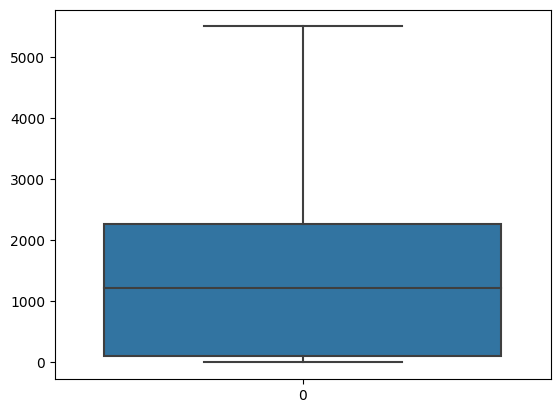

In [251]:
sns.boxplot(df["TVOC"])

Text(0.5, 1.0, 'TVOC Distribution')

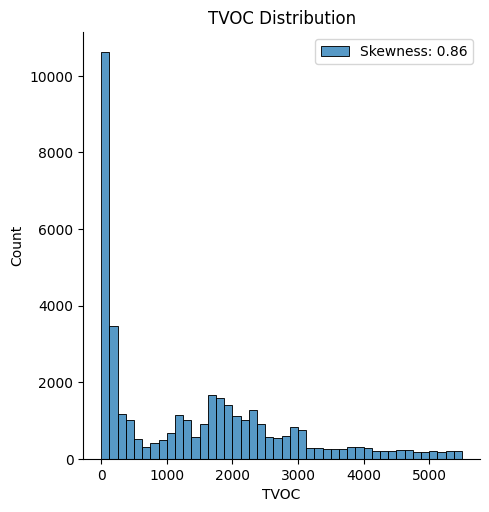

In [252]:
# TVOC distribution

sns.displot(df['TVOC'], label = 'Skewness: %.2f'%(df['TVOC'].skew()))
plt.legend(loc = 'best')
plt.title('TVOC Distribution')

<Axes: >

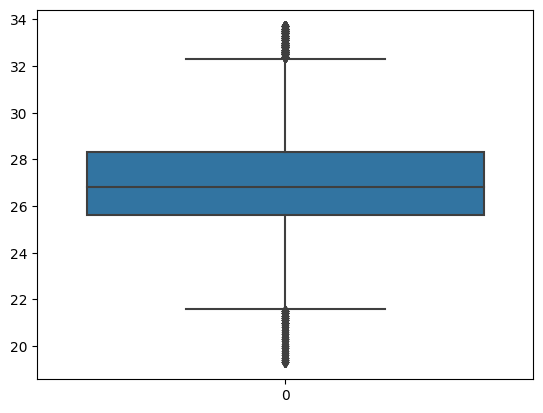

In [253]:
sns.boxplot(df["Temperature"])

In [254]:
df[(df["Temperature"] > 32) | (df["Temperature"] < 21)]

Date_Time  Temperature  Relative Humidity  PM2.5  TVOC  CO2  \
26045 2022-07-19 10:46:00         32.1               35.2      3  1039  444   
26046 2022-07-19 10:47:00         32.1               35.3      4  1024  441   
26047 2022-07-19 10:48:00         32.1               35.3      4   998  440   
26048 2022-07-19 10:49:00         32.1               35.3      4   994  441   
26049 2022-07-19 10:50:00         32.1               35.3      4  1036  443   
...                   ...          ...                ...    ...   ...  ...   
30219 2022-07-22 08:21:00         20.6               55.4      1   961  492   
30220 2022-07-22 08:22:00         20.7               55.2      1  1023  491   
30221 2022-07-22 08:23:00         20.8               55.1      1  1103  494   
30222 2022-07-22 08:24:00         20.8               54.9      1  1315  494   
30223 2022-07-22 08:25:00         20.9               54.9      1  1496  498   

       Air Pressure  PM1  PM4  PM10  Formaldehyde  Light  Sound  Virus Index  \
26045         991.1    3    3     3             4     37   30.4            5   
26046         991.0    3    4     4             4     37   30.3            5   
26047         991.0    4    4     4             4     39   30.2            5   
26048         991.0    4    4     4             5     39   30.2            5   
26049         991.0    3    4     4             5     39   30.4            5   
...             ...  ...  ...   ...           ...    ...    ...          ...   
30219        1001.0    1    1     1             0     12   30.1            1   
30220        1001.0    1    1     1             0     12   30.5            1   
30221        1001.0    1    1     1             0     13   30.3            1   
30222        1001.0    1    1     1             0     13   30.1            1   
30223        1001.0    1    1     1             0     12   30.1            1   

      day_of_week  hour_of_day  
26045     Tuesday           10  
26046     Tuesday           10  
26047     Tuesday           10  
26048     Tuesday           10  
26049     Tuesday           10  
...           ...          ...  
30219      Friday            8  
30220      Friday            8  
30221      Friday            8  
30222      Friday            8  
30223      Friday            8  

[783 rows x 16 columns]

In [255]:
783/42597

0.01838157616733573

In [256]:
df.drop(df[(df["Temperature"] > 32) | (df["Temperature"] < 21)].index, inplace=True)

Text(0.5, 1.0, 'Temperature Distribution')

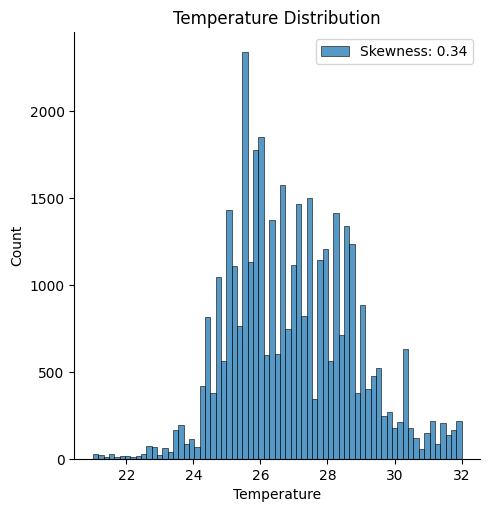

In [258]:
# Temperature distribution

sns.displot(df['Temperature'], label = 'Skewness: %.2f'%(df['Temperature'].skew()))
plt.legend(loc = 'best')
plt.title('Temperature Distribution')

<Axes: >

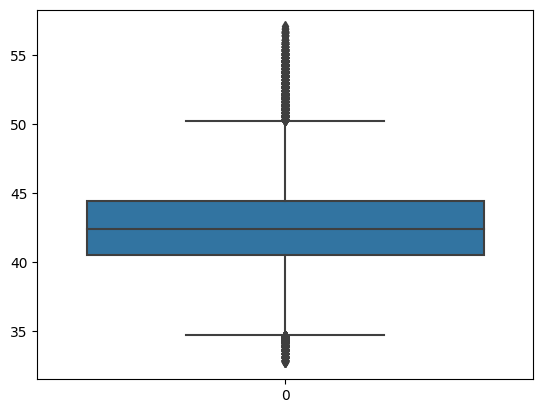

In [282]:
#Relative Humidity
sns.boxplot(df["Relative Humidity"])

In [283]:
df[(df["Relative Humidity"] > 50) | (df["Relative Humidity"] < 35)]

Date_Time  Temperature  Relative Humidity  PM2.5   TVOC  CO2  \
13736 2022-07-10 15:23:00         30.4               34.7      3     41  433   
13738 2022-07-10 15:25:00         30.4               34.9      2     69  436   
13755 2022-07-10 15:42:00         30.5               34.6      2    122  458   
13756 2022-07-10 15:43:00         30.4               34.5      2     66  443   
13759 2022-07-10 15:46:00         30.5               34.5      2    157  467   
...                   ...          ...                ...    ...    ...  ...   
42592 2022-07-30 23:54:00         26.2               51.3      1  34252  947   
42593 2022-07-30 23:55:00         26.2               51.3      1  36006  950   
42594 2022-07-30 23:56:00         26.2               51.3      2  33566  951   
42595 2022-07-30 23:57:00         26.2               51.3      2  31335  946   
42596 2022-07-30 23:58:00         26.2               51.4      1  30638  940   

       Air Pressure  PM1  PM4  PM10  Formaldehyde  Light  Sound  Virus Index  
13736        1005.7    3    3     3             0    116   30.5            5  
13738        1005.7    2    2     2             0     55   30.3            5  
13755        1005.6    2    2     2             0    147   30.4            5  
13756        1005.6    2    2     2             0    146   30.2            5  
13759        1005.6    2    2     2             0    106   30.0            5  
...             ...  ...  ...   ...           ...    ...    ...          ...  
42592         996.3    1    1     1           104      4   30.2            3  
42593         996.3    1    1     1            98      4   30.1            3  
42594         996.3    2    2     2            99      4   30.5            3  
42595         996.3    1    2     2            97      4   30.3            3  
42596         996.3    1    1     1            97      4   30.4            3  

[3560 rows x 14 columns]

In [284]:
3560/42597

0.08357396060755452

In [285]:
df.drop(df[(df["Relative Humidity"] > 50) | (df["Relative Humidity"] < 35)].index, inplace=True)

Text(0.5, 1.0, 'Relative Humidity Distribution')

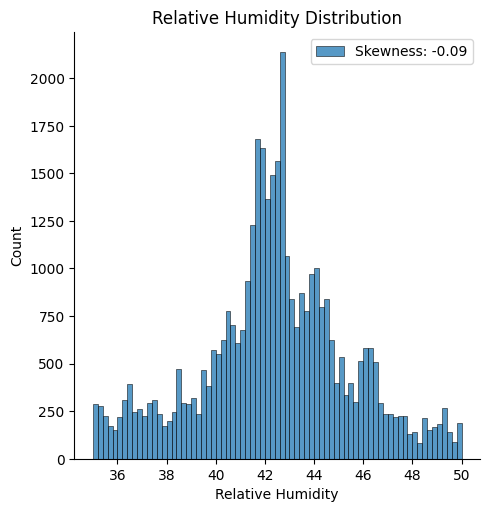

In [286]:

# Relative Humidity distribution

sns.displot(df['Relative Humidity'], label = 'Skewness: %.2f'%(df['Relative Humidity'].skew()))
plt.legend(loc = 'best')
plt.title('Relative Humidity Distribution')

##Splitting data

In [264]:
X = df.drop(labels=["PM2.5"], axis=1)
Y = df["PM2.5"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)
print(f"X_train\nShape: {X_train.shape}\n\nX_test\nShape: {X_test.shape}\n")
print(f"Y_train\nShape: {Y_train.shape}\n\nY_test\nShape: {Y_test.shape}\n")

X_train
Shape: (30518, 15)

X_test
Shape: (7630, 15)

Y_train
Shape: (30518,)

Y_test
Shape: (7630,)



1     16697
2      7811
0      6523
3      3075
4      1552
      ...  
93        1
75        1
90        1
89        1
70        1
Name: PM2.5, Length: 78, dtype: int64

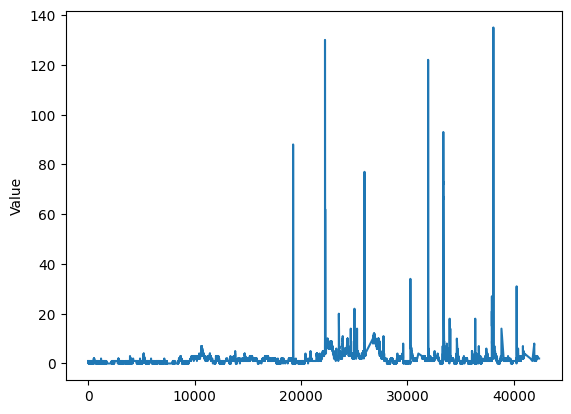